# Project 1 - London House Price

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [33]:
# Download and prepare the data
df = pd.read_csv("kaggle_london_house_price_data.csv")

In [34]:
df.head()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
0,"1 Guinness Court, Mansell Street, London, E1 8AB",E1 8AB,England,E1,51.512982,-0.073698,1.0,2.0,79.0,NaN,...,666000.0,LOW,2024-10-07T13:26:59.894Z,-29445000.0,-98.150000,2020-03-27,2020-03-27,30000000,NaN,NaN
1,"306 Marlyn Lodge, 2 Portsoken Street, London, ...",E1 8RB,England,E1,51.511881,-0.073471,1.0,1.0,54.0,1.0,...,546000.0,MEDIUM,2024-10-07T13:26:59.894Z,46000.0,10.222222,2022-09-16,2022-09-16,450000,NaN,NaN
2,"Flat 1, White Rose Court, Widegate Street, Lon...",E1 7ES,England,E1,51.517972,-0.078028,2.0,2.0,73.0,1.0,...,684000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,4.494382,2023-10-31,2023-10-31,623000,3.833333,23000.0
3,"Flat 1, White Rose Court, Widegate Street, Lon...",E1 7ES,England,E1,51.517972,-0.078028,2.0,2.0,73.0,1.0,...,684000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,4.494382,2023-10-31,2016-03-23,600000,155.319149,365000.0
4,"Flat 1, White Rose Court, Widegate Street, Lon...",E1 7ES,England,E1,51.517972,-0.078028,2.0,2.0,73.0,1.0,...,684000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,4.494382,2023-10-31,2005-11-28,235000,181.437126,151500.0


In [35]:
df.columns

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')

In [36]:
df.index

RangeIndex(start=0, stop=282872, step=1)

In [37]:
len(df)

282872

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282872 entries, 0 to 282871
Data columns (total 28 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                282872 non-null  object 
 1   postcode                                   282872 non-null  object 
 2   country                                    282872 non-null  object 
 3   outcode                                    282872 non-null  object 
 4   latitude                                   282872 non-null  float64
 5   longitude                                  282872 non-null  float64
 6   bathrooms                                  231769 non-null  float64
 7   bedrooms                                   256654 non-null  float64
 8   floorAreaSqM                               267060 non-null  float64
 9   livingRooms                                243737 non-null  float64
 10  tenure  

In [39]:
df.agg({
    'saleEstimate_currentPrice': ['min','mean','max'],
    'floorAreaSqM':  ['min','mean','max'],
     'bathrooms': ['min','mean','max'],
     'bedrooms': ['min','mean','max'],
     'livingRooms': ['min','mean','max'],
})

,saleEstimate_currentPrice,floorAreaSqM,bathrooms,bedrooms,livingRooms
min,8.900000e+04,10.000000,1.00000,1.000000,1.000000
mean,8.953505e+05,99.537288,1.44059,2.497732,1.292996
max,2.603100e+07,500.000000,9.00000,9.000000,9.000000


In [40]:
df.groupby('propertyType')['fullAddress'].count()

propertyType
Bungalow Property           292
Converted Flat            34058
Detached Bungalow           200
Detached House             7201
Detached Property           167
End Terrace Bungalow         38
End Terrace House         13924
End Terrace Property        167
Flat/Maisonette           65023
Mid Terrace Bungalow         69
Mid Terrace House         47881
Mid Terrace Property        141
Purpose Built Flat        72929
Semi-Detached Bungalow      255
Semi-Detached House       21881
Semi-Detached Property      301
Terrace Property          16551
Terraced                   1075
Terraced Bungalow            44
Name: fullAddress, dtype: int64

In [41]:
df[df['propertyType']=='Detached Bungalow'].head()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
4975,"48 Eagle Lane, London, E11 1PF",E11 1PF,England,E11,51.584522,0.023759,1.0,2.0,85.0,1.0,...,1049000.0,MEDIUM,2024-10-07T13:26:59.894Z,24000.0,2.580645,2022-09-30,2022-09-30,930000,226.315789,645000.0
4976,"48 Eagle Lane, London, E11 1PF",E11 1PF,England,E11,51.584522,0.023759,1.0,2.0,85.0,1.0,...,1049000.0,MEDIUM,2024-10-07T13:26:59.894Z,24000.0,2.580645,2022-09-30,2008-11-05,285000,176.699029,182000.0
4977,"48 Eagle Lane, London, E11 1PF",E11 1PF,England,E11,51.584522,0.023759,1.0,2.0,85.0,1.0,...,1049000.0,MEDIUM,2024-10-07T13:26:59.894Z,24000.0,2.580645,2022-09-30,1996-10-23,103000,NaN,NaN
5563,"8 Raynes Avenue, London, E11 2LS",E11 2LS,England,E11,51.570553,0.037512,1.0,3.0,128.0,2.0,...,1436000.0,MEDIUM,2024-10-07T13:26:59.894Z,6000.0,0.461538,2022-04-08,2022-04-08,1300000,NaN,NaN
15098,"23 Croombs Road, London, E16 3RN",E16 3RN,England,E16,51.515564,0.034279,2.0,4.0,108.0,1.0,...,501000.0,MEDIUM,2024-10-07T13:26:59.894Z,105000.0,30.000000,2017-10-02,2017-10-02,350000,NaN,NaN


In [42]:
df[df['propertyType']=='Detached House'].head()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
625,"19 Bromley Street, London, E1 0NB",E1 0NB,England,E1,51.514011,-0.042999,1.0,2.0,91.0,1.0,...,864000.0,HIGH,2024-10-07T13:26:59.894Z,23000.0,2.875000,2024-04-22,2024-04-22,800000,9.589041,70000.0
626,"19 Bromley Street, London, E1 0NB",E1 0NB,England,E1,51.514011,-0.042999,1.0,2.0,91.0,1.0,...,864000.0,HIGH,2024-10-07T13:26:59.894Z,23000.0,2.875000,2024-04-22,2018-11-30,730000,156.140351,445000.0
627,"19 Bromley Street, London, E1 0NB",E1 0NB,England,E1,51.514011,-0.042999,1.0,2.0,91.0,1.0,...,864000.0,HIGH,2024-10-07T13:26:59.894Z,23000.0,2.875000,2024-04-22,2005-12-22,285000,NaN,NaN
813,"9 Roland Mews, London, E1 3JT",E1 3JT,England,E1,51.520485,-0.047824,1.0,2.0,92.0,1.0,...,793000.0,HIGH,2024-10-07T13:26:59.894Z,19000.0,2.617005,2023-03-03,2023-03-03,736720,194.688000,486720.0
814,"9 Roland Mews, London, E1 3JT",E1 3JT,England,E1,51.520485,-0.047824,1.0,2.0,92.0,1.0,...,793000.0,HIGH,2024-10-07T13:26:59.894Z,19000.0,2.617005,2023-03-03,2005-11-25,250000,NaN,NaN


In [43]:
df = pd.DataFrame(df.dropna(subset=['floorAreaSqM', 'saleEstimate_currentPrice']))

In [44]:
df = pd.DataFrame(df[['outcode',
                   'bedrooms', 
                   'livingRooms',
                   'floorAreaSqM',
                   'propertyType', 
                   'currentEnergyRating',
                   'saleEstimate_currentPrice']])

In [45]:
df.isna().sum()

outcode                          0
bedrooms                     20188
livingRooms                  30492
floorAreaSqM                     0
propertyType                     3
currentEnergyRating          46611
saleEstimate_currentPrice        0
dtype: int64

In [46]:
df['price_for_m_square'] = df['saleEstimate_currentPrice'] / df['floorAreaSqM']
df.head()

,outcode,bedrooms,livingRooms,floorAreaSqM,propertyType,currentEnergyRating,saleEstimate_currentPrice,price_for_m_square
0,E1,2.0,NaN,79.0,Flat/Maisonette,NaN,555000.0,7025.316456
1,E1,1.0,1.0,54.0,Purpose Built Flat,NaN,496000.0,9185.185185
2,E1,2.0,1.0,73.0,Purpose Built Flat,D,651000.0,8917.808219
3,E1,2.0,1.0,73.0,Purpose Built Flat,D,651000.0,8917.808219
4,E1,2.0,1.0,73.0,Purpose Built Flat,D,651000.0,8917.808219


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266633 entries, 0 to 282869
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   outcode                    266633 non-null  object 
 1   bedrooms                   246445 non-null  float64
 2   livingRooms                236141 non-null  float64
 3   floorAreaSqM               266633 non-null  float64
 4   propertyType               266630 non-null  object 
 5   currentEnergyRating        220022 non-null  object 
 6   saleEstimate_currentPrice  266633 non-null  float64
 7   price_for_m_square         266633 non-null  float64
dtypes: float64(5), object(3)
memory usage: 18.3+ MB


In [48]:
gr = df.groupby('propertyType')
gr.agg({'price_for_m_square':['count','mean']})

price_for_m_square              
                                    count          mean
propertyType                                           
Bungalow Property                     284   8191.337610
Converted Flat                      33216   8662.735809
Detached Bungalow                     195   7619.225106
Detached House                       6805   9459.940562
Detached Property                      56  11095.710140
End Terrace Bungalow                   38   7926.660192
End Terrace House                   13628   7718.001092
End Terrace Property                  129   9465.926661
Flat/Maisonette                     54932  10293.774105
Mid Terrace Bungalow                   69   7295.112098
Mid Terrace House                   47574   8322.416894
Mid Terrace Property                   43   8891.186303
Purpose Built Flat                  71927   7666.805069
Semi-Detached Bungalow                245   7204.959078
Semi-Detached House                 21319   7804.616990
Semi-Detached Property                124   9597.607004
Terrace Property                    15630   8917.084900
Terraced                              376  10584.559274
Terraced Bungalow                      40   8683.616004

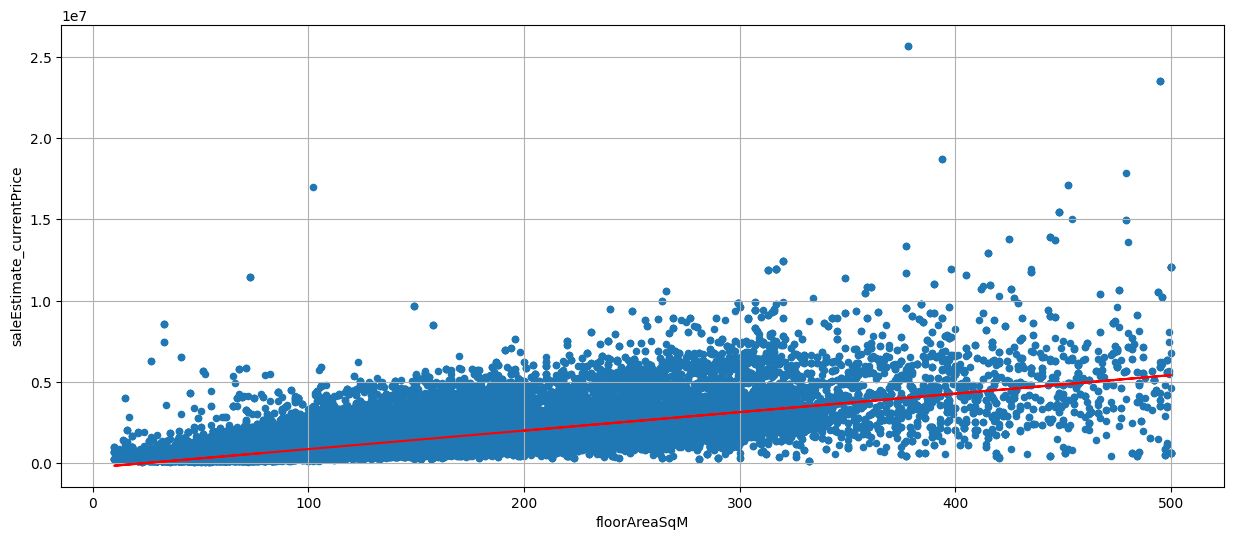

In [49]:
X = df[["floorAreaSqM"]].values
y = df["saleEstimate_currentPrice"].values
# Visualize the data
df.plot(kind='scatter', grid=True,
 x="floorAreaSqM", y="saleEstimate_currentPrice",
       figsize=(15,6))

# Select a linear model
model = LinearRegression()
# Train the model
model.fit(X, y)
# Make a prediction for Cyprus
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.show()


In [50]:
model.predict(df[['floorAreaSqM']].values)

array([ 646498.39821972,  362374.17041277,  578308.58354605, ...,
       1794360.27855982, 1476141.14341603, 2021659.66080538],
      shape=(266633,))

In [51]:
X_new = pd.DataFrame([[75]])
model.predict(X_new)

array([601038.52177061])

In [52]:
df["saleEstimate_currentPrice"].values - model.predict(df[['floorAreaSqM']].values)

array([ -91498.39821972,  133625.82958723,   72691.41645395, ...,
       1483639.72144018, 2115858.85658397, 1923340.33919462],
      shape=(266633,))

In [53]:
(sum([x*x 
    for x in 
    df["saleEstimate_currentPrice"].values - model.predict(df[['floorAreaSqM']].values)]) / 
  df["saleEstimate_currentPrice"].count() / 1e6)

np.float64(318444.5550501834)

In [54]:
# Drop outliners
lower_bound = df['price_for_m_square'].quantile(0.05)
upper_bound = df['price_for_m_square'].quantile(0.95)

df1 = pd.DataFrame(df[(df['price_for_m_square']>lower_bound) &
                   (df['price_for_m_square']<upper_bound)])

In [55]:
df1['rooms'] = df1['bedrooms'] + df1['livingRooms']
df1['room_square'] = df1['floorAreaSqM'] / df1['rooms']
df1['room_square'].min(), df1['room_square'].max()

(np.float64(2.8), np.float64(214.0))

In [56]:
df1.drop(df1[df1['room_square']<5].index, inplace=True)
df1

,outcode,bedrooms,livingRooms,floorAreaSqM,propertyType,currentEnergyRating,saleEstimate_currentPrice,price_for_m_square,rooms,room_square
0,E1,2.0,NaN,79.0,Flat/Maisonette,NaN,555000.0,7025.316456,NaN,NaN
1,E1,1.0,1.0,54.0,Purpose Built Flat,NaN,496000.0,9185.185185,2.0,27.000000
2,E1,2.0,1.0,73.0,Purpose Built Flat,D,651000.0,8917.808219,3.0,24.333333
3,E1,2.0,1.0,73.0,Purpose Built Flat,D,651000.0,8917.808219,3.0,24.333333
4,E1,2.0,1.0,73.0,Purpose Built Flat,D,651000.0,8917.808219,3.0,24.333333
...,...,...,...,...,...,...,...,...,...,...
282756,WC2R,3.0,NaN,287.0,Flat/Maisonette,B,2776000.0,9672.473868,NaN,NaN
282791,WC2R,NaN,NaN,460.0,Flat/Maisonette,C,2140000.0,4652.173913,NaN,NaN
282794,WC2R,1.0,1.0,97.0,Purpose Built Flat,B,1545000.0,15927.835052,2.0,48.500000
282837,WC2R,4.0,2.0,242.0,Flat/Maisonette,B,3815000.0,15764.462810,6.0,40.333333


In [57]:
districts = pd.Series(df1['outcode'].unique())
districts

0        E1
1       E10
2       E11
3       E12
4       E13
       ... 
163    WC2B
164    WC2E
165    WC2H
166    WC2N
167    WC2R
Length: 168, dtype: object

In [58]:
def get_district(d):
    return districts[districts == d['outcode']].index[0]

In [59]:
df1['districts'] = df1.apply(get_district,axis='columns')
df1[['outcode','districts']]

,outcode,districts
0,E1,0
1,E1,0
2,E1,0
3,E1,0
4,E1,0
...,...,...
282756,WC2R,167
282791,WC2R,167
282794,WC2R,167
282837,WC2R,167


In [60]:
df1['currentEnergyRating'] = np.where(df1['currentEnergyRating'].isna(), 
                                     'G', df1['currentEnergyRating'])
df1['currentEnergyRating'].unique().sort()

In [65]:
energyRatings = df1['currentEnergyRating'].unique()
energyRatings.sort()
energyRatings

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [66]:
energyRatings = {value: i for i, value in enumerate(energyRatings)}
energyRatings

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [67]:
df1['currentEnergyRating'] = df1['currentEnergyRating'].map(energyRatings)
df1['currentEnergyRating']

0         6
1         6
2         3
3         3
4         3
         ..
282756    1
282791    2
282794    1
282837    1
282838    2
Name: currentEnergyRating, Length: 239960, dtype: int64

In [68]:
df1.columns

Index(['outcode', 'bedrooms', 'livingRooms', 'floorAreaSqM', 'propertyType',
       'currentEnergyRating', 'saleEstimate_currentPrice',
       'price_for_m_square', 'rooms', 'room_square', 'districts'],
      dtype='object')

In [70]:
df1[['districts','currentEnergyRating','rooms','floorAreaSqM']].isna().sum()

districts                  0
currentEnergyRating        0
rooms                  28027
floorAreaSqM               0
dtype: int64

In [71]:
df1['rooms'] = np.where(df1['rooms'].isna(), 1, df1['rooms'])
df1['rooms'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., 10.,  8., 11.,  9., 12., 14.,
       13., 15.])

In [75]:
model_multi=LinearRegression()
X = df1[['districts','currentEnergyRating','rooms','floorAreaSqM']]
y = df1['saleEstimate_currentPrice']
model_multi.fit(X, y)
model_multi.predict(df1[['districts','currentEnergyRating','rooms','floorAreaSqM']].loc[0:0])

array([605797.49691066])